# Visualise and summaries occlusion maps

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import glob
import cv2

In [12]:
# Load paths
test_paths = glob.glob('../../data/LICS/test/*')
print(len(test_paths))

map_paths = glob.glob('../maps/*')
print(len(map_paths))

100
55


(256, 256, 11)


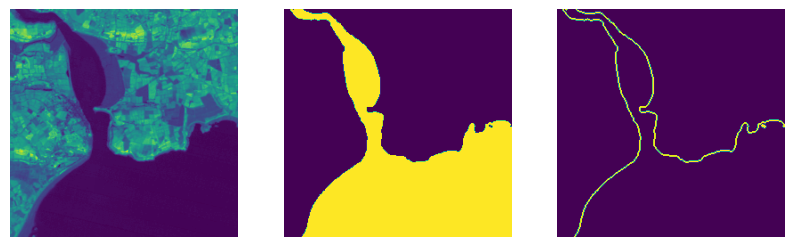

In [13]:
name = "LT05_L2SP_207024_19871024_20201014_02_T1"
path = f'../../data/LICS/test/{name}.npy'

# Load data
data = np.load(path)
print(data.shape)

nir = data[:,:,3]
mask = data[:,:,-2]
edge = data[:,:,-1]

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(nir)
ax[1].imshow(mask)
ax[2].imshow(edge)

for a in ax:
    a.axis('off')

In [14]:
def occlusion_visualisation(background, map, alpha=0.5, use_rgb=True):
    """Overlay the occlusion map on the background image.
    
    Args:
        background (np.array): The background image.
        map (np.array): The occlusion map.
        alpha (float): The transparency of the occlusion map.
        
    Returns:
        np.array: The visualization.
    """
    # Normalize the occlusion map to the range [0, 1]
    map = (map - np.min(map)) / (np.max(map) - np.min(map) + 1e-8)

     # Convert the occlusion map to a heatmap
    heatmap = cv2.applyColorMap((map * 255).astype(np.uint8), cv2.COLORMAP_JET)

    if use_rgb:
        heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    
    # Ensure the background is 3-channel (RGB)
    if len(background.shape) == 2 or background.shape[2] == 1:  # Grayscale or binary segmentation
        background = cv2.cvtColor(background, cv2.COLOR_GRAY2RGB)
    
    # Convert both background and heatmap to the same data type (uint8)
    if background.dtype != np.uint8:
        background = (255 * (background - np.min(background)) / (np.max(background) - np.min(background) + 1e-8)).astype(np.uint8)
    
    # Overlay the heatmap on the background
    overlay = cv2.addWeighted(heatmap, alpha, background, 1 - alpha, 0)
    
    return overlay

def plot_occlusion_map(img, overlay):
    # Plotting the occlusion map
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].imshow(img)
    ax[0].set_title('Image')

    ax[1].imshow(overlay)
    ax[1].set_title('Occlusion Map')
    
    for a in ax:
        a.axis('off')

In [8]:
name = "LT05_L2SP_208024_20110323_20200823_02_T1"
maps = [m for m in map_paths if name in m]
sp_maps = [m for m in maps if 'superpixel' in m]
regular_maps = [m for m in maps if 'superpixel' not in m]
print(len(maps),len(sp_maps), len(regular_maps))

sp_masks = [m for m in sp_maps if 'mask' in m]
regular_masks = [m for m in regular_maps if 'mask' in m]
print(len(sp_masks), len(regular_masks))

sp_pixels = [m for m in sp_maps if '_pixel' in m]
regular_pixels = [m for m in regular_maps if '_pixel' in m]
print(len(sp_pixels), len(regular_pixels))

15 0 15
0 5
0 10


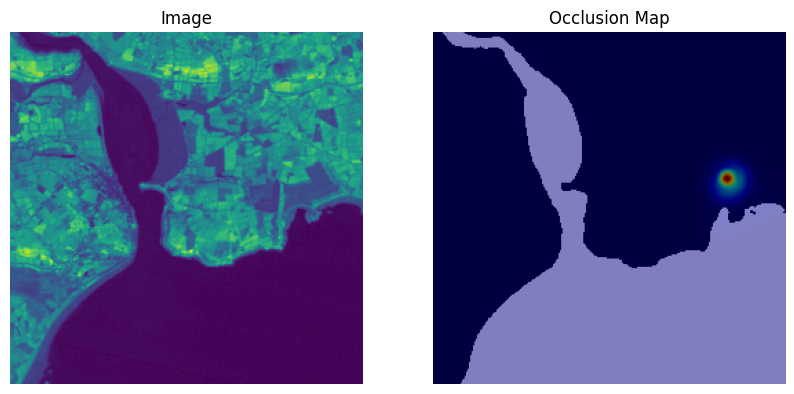

In [9]:
heatmap = np.load(map_paths[0])
overlay = occlusion_visualisation(mask, heatmap, alpha=0.5)
plot_occlusion_map(nir, overlay)

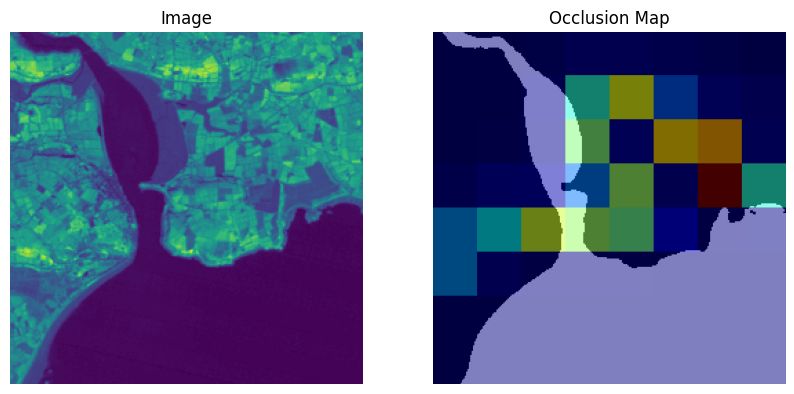

In [10]:
name = "LT05_L2SP_208024_20110323_20200823_02_T1_mask_fn_32_32.npy"
heatmap = np.load(f'../maps/{name}')
overlay = occlusion_visualisation(mask, heatmap, alpha=0.5)
plot_occlusion_map(nir, overlay)

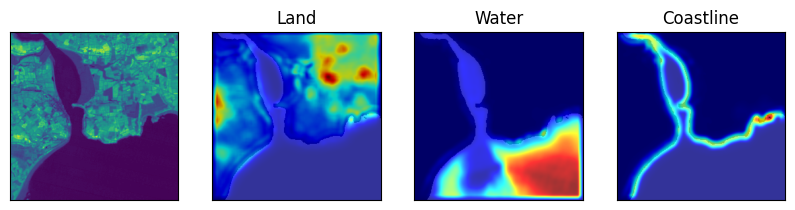

In [44]:
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

ax[0].imshow(nir)

for map in regular_masks:
    heatmap = np.load(map)
    overlay = occlusion_visualisation(mask, heatmap, alpha=0.8)

    if 'land' in map:
        ax[1].imshow(overlay)
        ax[1].set_title('Land')
    elif 'water' in map:
        ax[2].imshow(overlay)
        ax[2].set_title('Water')
    elif 'coastline' in map:
        ax[3].imshow(overlay)
        ax[3].set_title('Coastline')

for a in ax:
    a.set_xticks([])
    a.set_yticks([])

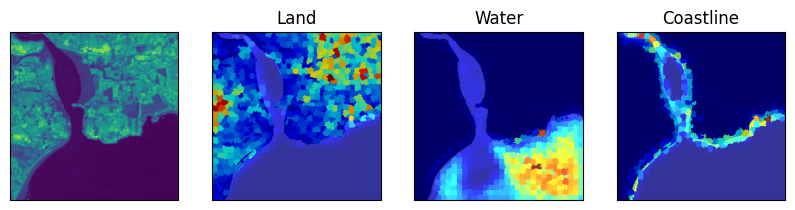

In [41]:
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

ax[0].imshow(nir)

for map in sp_masks:
    heatmap = np.load(map)
    overlay = occlusion_visualisation(mask, heatmap, alpha=0.8)

    if 'land' in map:
        ax[1].imshow(overlay)
        ax[1].set_title('Land')
    elif 'water' in map:
        ax[2].imshow(overlay)
        ax[2].set_title('Water')
    elif 'coastline' in map:
        ax[3].imshow(overlay)
        ax[3].set_title('Coastline')

for a in ax:
    a.set_xticks([])
    a.set_yticks([])

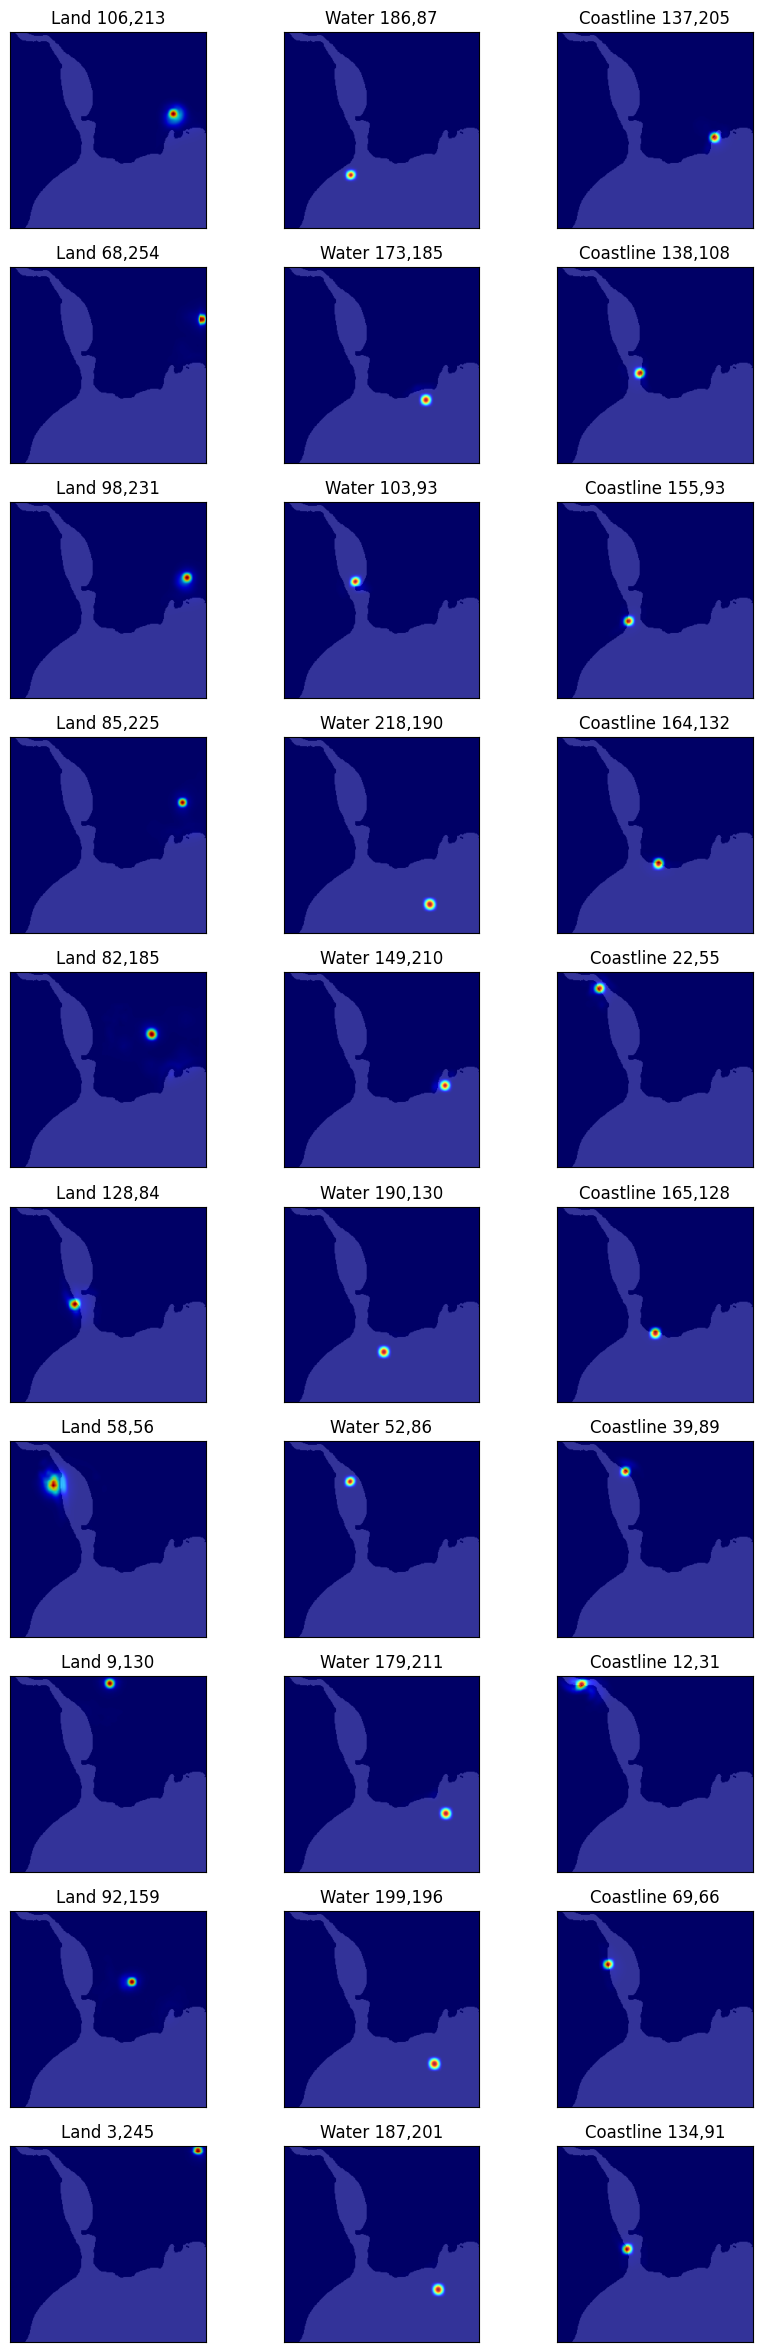

In [47]:
fig, ax = plt.subplots(10, 3, figsize=(10, 30))

l = 0
w = 0
c = 0

for map in regular_pixels:
    heatmap = np.load(map)
    overlay = occlusion_visualisation(mask, heatmap, alpha=0.8)
    split = map.split('_')
    x = int(split[-4])
    y = int(split[-3])

    if 'land' in map:
        ax[l,0].imshow(overlay)
        ax[l,0].set_title(f'Land {x},{y}')
        l += 1

    elif 'water' in map:
        ax[w,1].imshow(overlay)
        ax[w,1].set_title(f'Water {x},{y}')
        w += 1
    
    elif 'coastline' in map:
        ax[c,2].imshow(overlay)
        ax[c,2].set_title(f'Coastline {x},{y}')
        c += 1

for a in ax.flatten():
    a.set_xticks([])
    a.set_yticks([])

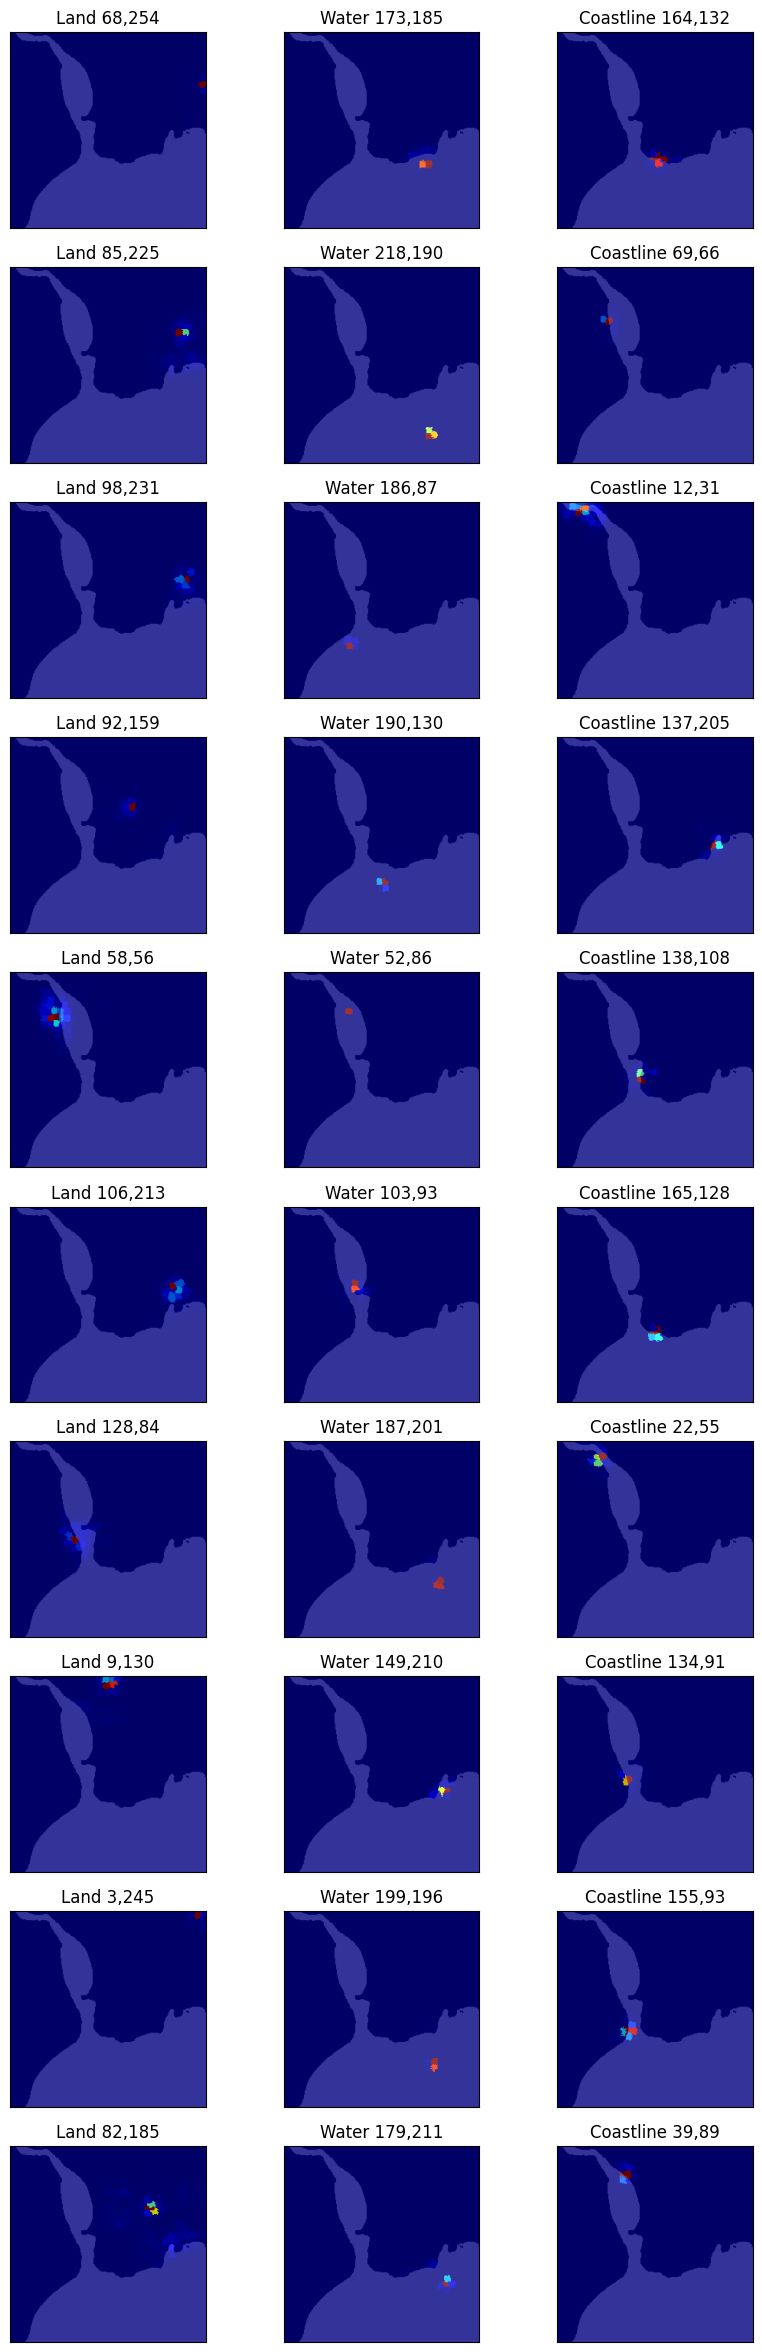

In [49]:
fig, ax = plt.subplots(10, 3, figsize=(10, 30))

l = 0
w = 0
c = 0

for map in sp_pixels:
    heatmap = np.load(map)
    overlay = occlusion_visualisation(mask, heatmap, alpha=0.8)
    split = map.split('_')
    x = int(split[-3])
    y = int(split[-2])

    if 'land' in map:
        ax[l,0].imshow(overlay)
        ax[l,0].set_title(f'Land {x},{y}')
        l += 1

    elif 'water' in map:
        ax[w,1].imshow(overlay)
        ax[w,1].set_title(f'Water {x},{y}')
        w += 1
    
    elif 'coastline' in map:
        ax[c,2].imshow(overlay)
        ax[c,2].set_title(f'Coastline {x},{y}')
        c += 1

for a in ax.flatten():
    a.set_xticks([])
    a.set_yticks([])